In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# CSV Befehl um csv als pandas einzulesen
df = pd.read_csv("project/survey_results_public.csv")
df.set_index("ResponseId", inplace=True)

#### Befehl um alle "SO"-Spalten zu droppen

Warum haben wir das gedroppt?
-> Nur Bezug auf Stackoverflow Sachen, ist nicht Relevant für uns.

In [3]:
df = df.drop(columns=df.columns[df.columns.str.startswith('SO')])
df[['Age', 'YearsCode', 'JobSat']]

,Age,YearsCode,JobSat
ResponseId,,,
1,25-34 years old,14.0,10.0
2,25-34 years old,10.0,9.0
3,35-44 years old,12.0,8.0
4,35-44 years old,5.0,6.0
5,35-44 years old,22.0,7.0
...,...,...,...
49119,25-34 years old,13.0,8.0
49120,35-44 years old,15.0,NaN
49121,25-34 years old,NaN,NaN


In [4]:
df.to_csv("project/survey_results_public_without_SO.csv", index=False)

## Box-Plot

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/var/folders/dr/lf4__k395mg4yymndm95cms00000gn/T/ipykernel_38975/178850461.py:5: SyntaxWarning: invalid escape sequence '\d'
  plot_df['Age_Numeric'] = plot_df['Age'].str.extract('(\d+)').astype(float)


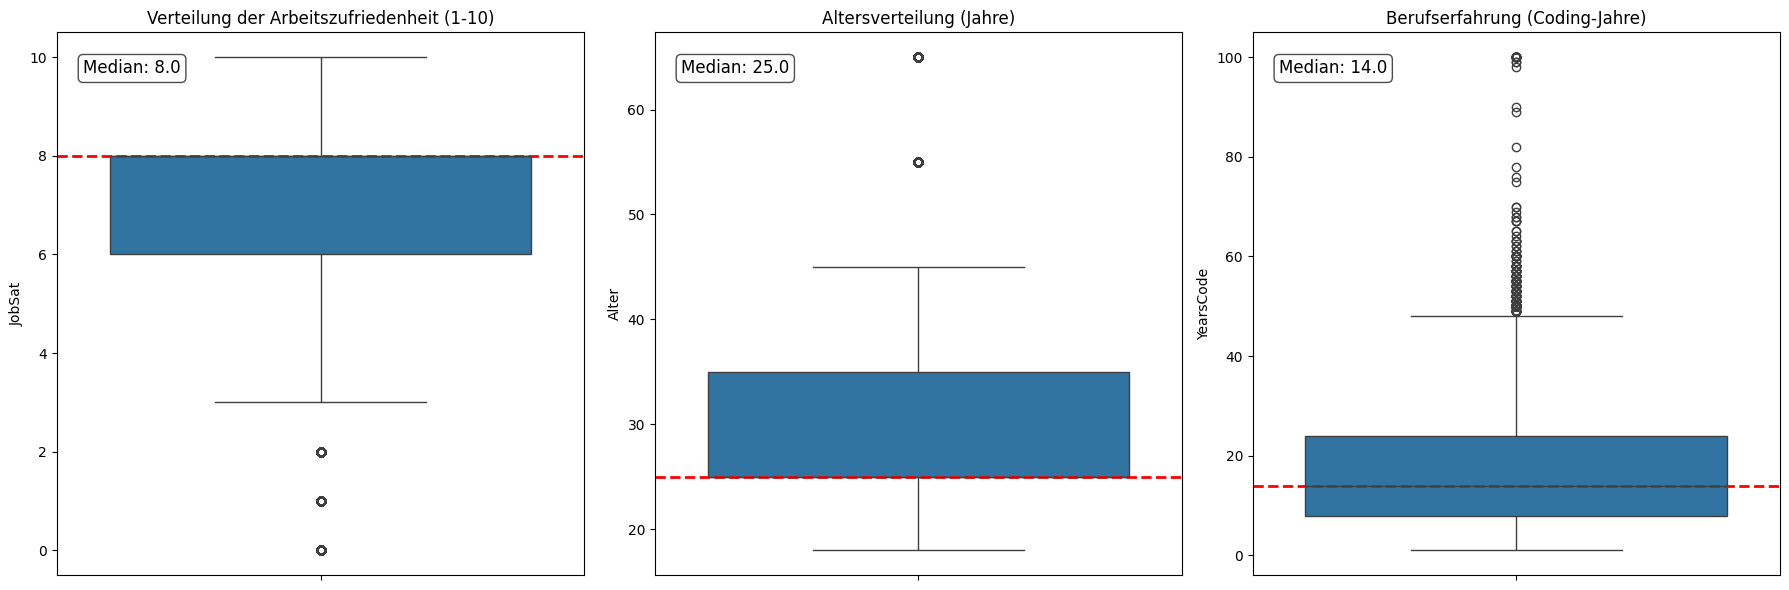

In [5]:
 #Create a copy of the dataframe to work with
plot_df = df[['Age', 'YearsCode', 'JobSat']].copy()

# Convert Age to numeric (extract numbers from the age ranges)
plot_df['Age_Numeric'] = plot_df['Age'].str.extract('(\d+)').astype(float)

# Create the figure with subplots
plt.figure(figsize=(18, 6))

# 1. JobSat Boxplot
plt.subplot(1, 3, 1)
ax1 = sns.boxplot(y='JobSat', data=plot_df.dropna(subset=['JobSat']))
plt.title('Verteilung der Arbeitszufriedenheit (1-10)')
# Add median line
med1 = plot_df['JobSat'].median()
ax1.axhline(med1, color='red', linestyle='dashed', linewidth=2)
ax1.text(0.05, 0.95, f'Median: {med1:.1f}', transform=ax1.transAxes, 
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

# 2. Age Boxplot (using the numeric version)
plt.subplot(1, 3, 2)
ax2 = sns.boxplot(y='Age_Numeric', data=plot_df.dropna(subset=['Age_Numeric']))
plt.title('Altersverteilung (Jahre)')
plt.ylabel('Alter')
# Add median line
med2 = plot_df['Age_Numeric'].median()
ax2.axhline(med2, color='red', linestyle='dashed', linewidth=2)
ax2.text(0.05, 0.95, f'Median: {med2:.1f}', transform=ax2.transAxes, 
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

# 3. YearsCode Boxplot
plt.subplot(1, 3, 3)
ax3 = sns.boxplot(y='YearsCode', data=plot_df.dropna(subset=['YearsCode']))
plt.title('Berufserfahrung (Coding-Jahre)')
# Add median line
med3 = plot_df['YearsCode'].median()
ax3.axhline(med3, color='red', linestyle='dashed', linewidth=2)
ax3.text(0.05, 0.95, f'Median: {med3:.1f}', transform=ax3.transAxes, 
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

# Improve layout and display the plot
plt.tight_layout()
plt.show()

## Boxplot-Deutung

### Arbeitszufriedenheit
- **Median:** 8 → Hohe allgemeine Zufriedenheit.  
- **Interquartilsabstand (IQR):** ca. 6–8 → Mehrheit liegt im oberen Zufriedenheitsbereich.  
- **Whisker:** 3–10 → Streuung moderat, nach unten etwas breiter.  
- **Ausreißer:** Einzelne sehr niedrige Werte (0–2), wenige hohe.

### Altersverteilung
- **Median:** ca. 25 Jahre → Mehrheit jung.  
- **IQR:** 25–35 Jahre → 50 % der Befragten in diesem Altersbereich.  
- **Whisker:** ca. <20 bis 65 Jahre → geringe, aber deutliche Randwerte.  
- **Ausreißer:** Wenige sehr junge oder ältere Teilnehmende.

### Berufserfahrung (Coding)
- **Median:** 14 Jahre → solide durchschnittliche Erfahrung.  
- **IQR:** 10–25 Jahre → Hälfte der Werte in diesem Bereich.  
- **Whisker:** 0–50 Jahre → große Spannweite.  
- **Ausreißer:** Extremwerte bis >80 Jahre → wahrscheinlich Eingabefehler.


## Scatter-Plot

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/var/folders/dr/lf4__k395mg4yymndm95cms00000gn/T/ipykernel_38975/3343736548.py:5: SyntaxWarning: invalid escape sequence '\d'
  scatter_df['Age_Numeric'] = scatter_df['Age'].str.extract('(\d+)').astype(float)


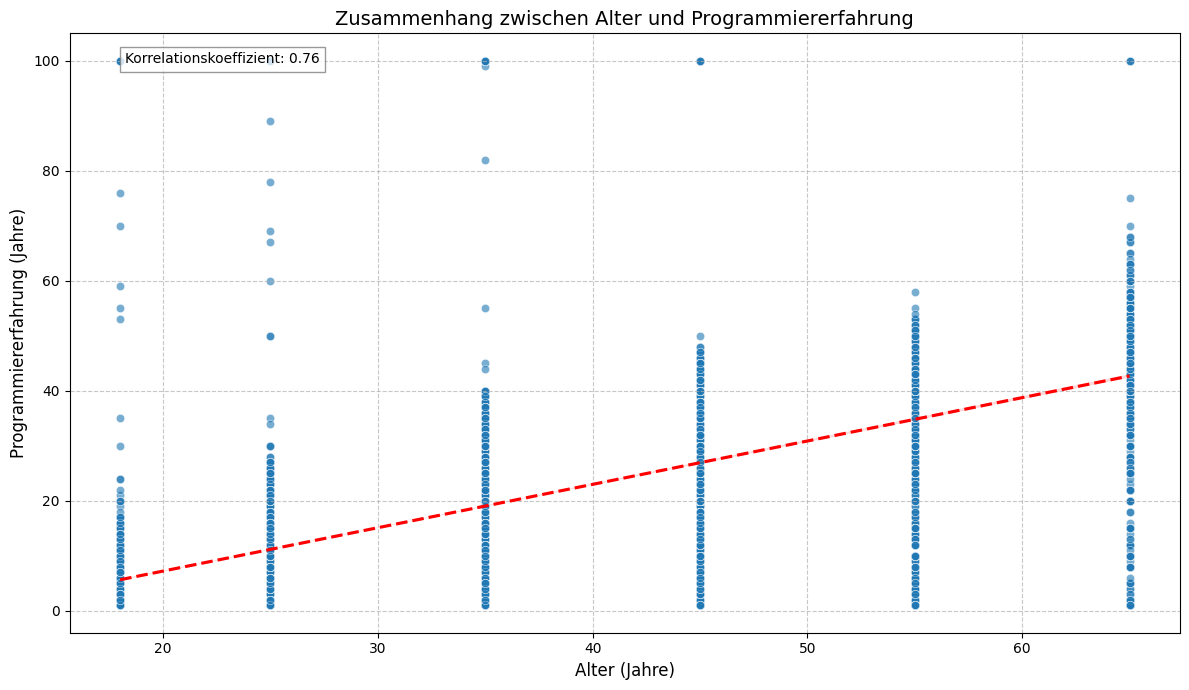

In [6]:
# Create a clean dataframe with the required columns
scatter_df = df[['Age', 'YearsCode']].copy()

# Convert Age to numeric (extract numbers from the age ranges)
scatter_df['Age_Numeric'] = scatter_df['Age'].str.extract('(\d+)').astype(float)

# Convert YearsCode to numeric (handle any non-numeric values)
scatter_df['YearsCode'] = pd.to_numeric(scatter_df['YearsCode'], errors='coerce')
scatter_df = scatter_df.dropna(subset=['Age_Numeric', 'YearsCode'])

# Create the scatter plot
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(x='Age_Numeric', y='YearsCode', data=scatter_df, alpha=0.6)

# Add a regression line
sns.regplot(x='Age_Numeric', y='YearsCode', data=scatter_df, 
            scatter=False, color='red', line_kws={'linestyle':'--'})

# Add labels and title
plt.title('Zusammenhang zwischen Alter und Programmiererfahrung', fontsize=14)
plt.xlabel('Alter (Jahre)', fontsize=12)
plt.ylabel('Programmiererfahrung (Jahre)', fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Calculate and display correlation
corr = np.corrcoef(scatter_df['Age_Numeric'], scatter_df['YearsCode'])[0, 1]
plt.text(0.05, 0.95, f'Korrelationskoeffizient: {corr:.2f}', 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

plt.tight_layout()
plt.show()

## Scatterplot-Deutung: Programmiererfahrung vs. Alter

- **Korrelation:** r = 0,76 → deutlicher positiver Zusammenhang zwischen Alter und Coding-Erfahrung.  
- **Interpretation:** Ältere Personen haben im Schnitt mehr Programmiererfahrung.  
- **Ausreißer:** Unlogische Werte (z. B. <20 Jahre alt mit >20 Jahren Erfahrung) → sollten gefiltert werden.  
- **Fazit:** Starke lineare Beziehung, aber Datenbereinigung notwendig.


## Sortierung des Datensatzes

In [7]:
# Create a copy and ensure YearsCode is numeric
df_sorted = df.copy()
df_sorted['YearsCode'] = pd.to_numeric(df_sorted['YearsCode'], errors='coerce')

# Sort by YearsCode (ascending order)
df_sorted = df_sorted.sort_values('YearsCode')

# Display relevant columns
df_sorted[['YearsCode', 'Age', 'JobSat', 'WorkExp']].head(20)

,YearsCode,Age,JobSat,WorkExp
ResponseId,,,,
34540,1.0,25-34 years old,NaN,8.0
23858,1.0,45-54 years old,NaN,20.0
23856,1.0,18-24 years old,NaN,NaN
31076,1.0,35-44 years old,NaN,8.0
36900,1.0,35-44 years old,NaN,14.0
40096,1.0,18-24 years old,NaN,NaN
46198,1.0,55-64 years old,NaN,38.0
31046,1.0,25-34 years old,NaN,4.0
31043,1.0,25-34 years old,NaN,NaN


Die Analyse von Erfahrungsjahren ermöglicht der HR-Abteilung, gezielte Personalentwicklungsmaßnahmen abzuleiten und frühzeitig auf Unzufriedenheit zu reagieren, was die Mitarbeiterbindung stärkt. Mann kann sich darauf konzentrieren ein junges Team aufzubauen oder etwas mehr Erfahrung mit in das Unternehmen zu nehmen.

## Statistische Zusammenfassung

In [8]:
# Konvertiere YearsCode in numerische Werte
df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')

# Statistische Zusammenfassung
years_code_stats = df['YearsCode'].describe()

# Zusätzliche Metriken
median = df['YearsCode'].median()
mode = df['YearsCode'].mode()[0]
iqr = df['YearsCode'].quantile(0.75) - df['YearsCode'].quantile(0.25)

# Ausgabe
print("Statistische Zusammenfassung - Programmiererfahrung (Jahre):")
print("----------------------------------------------------")
print(f"Anzahl gültiger Werte: {years_code_stats['count']:.0f}")
print(f"Durchschnitt: {years_code_stats['mean']:.1f} Jahre")
print(f"Median: {median:.1f} Jahre")
print(f"Häufigster Wert (Modus): {mode:.0f} Jahre")
print(f"Standardabweichung: {years_code_stats['std']:.1f} Jahre")
print(f"Minimum: {years_code_stats['min']:.0f} Jahre")
print(f"25%-Quartil: {years_code_stats['25%']:.1f} Jahre")
print(f"50%-Quartil (Median): {years_code_stats['50%']:.1f} Jahre")
print(f"75%-Quartil: {years_code_stats['75%']:.1f} Jahre")
print(f"Maximum: {years_code_stats['max']:.0f} Jahre")
print(f"Interquartilsabstand (IQR): {iqr:.1f} Jahre")

Statistische Zusammenfassung - Programmiererfahrung (Jahre):
----------------------------------------------------
Anzahl gültiger Werte: 43000
Durchschnitt: 16.6 Jahre
Median: 14.0 Jahre
Häufigster Wert (Modus): 10 Jahre
Standardabweichung: 11.8 Jahre
Minimum: 1 Jahre
25%-Quartil: 8.0 Jahre
50%-Quartil (Median): 14.0 Jahre
75%-Quartil: 24.0 Jahre
Maximum: 100 Jahre
Interquartilsabstand (IQR): 16.0 Jahre


## Gruppierung des Datensatzes

In [9]:
# Create a copy of the dataframe
df_sorted = df.copy()

# Convert Age to numeric for proper sorting (using the lower bound of the age range)
df_sorted['Age_Numeric'] = df_sorted['Age'].str.extract('(\d+)').astype(float)

# Define the categorization function
def categorize_jobsat(score):
    if pd.isna(score):
        return 'Keine Angabe'
    score = float(score)
    if score >= 7:
        return 'Sehr zufrieden'
    elif score >= 4:
        return 'Okey'
    else:
        return 'Unzufrieden'

# Apply the categorization
df_sorted['JobSat_Kategorie'] = df_sorted['JobSat'].apply(categorize_jobsat)

# Define the custom sort order for JobSat
job_sat_order = ['Unzufrieden', 'Okey', 'Sehr zufrieden', 'Keine Angabe']
df_sorted['JobSat_Kategorie'] = pd.Categorical(
    df_sorted['JobSat_Kategorie'], 
    categories=job_sat_order,
    ordered=True
)

# Sort by JobSat_Kategorie first, then by Age_Numeric
df_sorted = df_sorted.sort_values(['JobSat_Kategorie', 'Age_Numeric'])

# Display the relevant columns
df_sorted[['JobSat', 'JobSat_Kategorie', 'Age', 'Age_Numeric']].head(20)

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/var/folders/dr/lf4__k395mg4yymndm95cms00000gn/T/ipykernel_38975/2361266194.py:5: SyntaxWarning: invalid escape sequence '\d'
  df_sorted['Age_Numeric'] = df_sorted['Age'].str.extract('(\d+)').astype(float)


,JobSat,JobSat_Kategorie,Age,Age_Numeric
ResponseId,,,,
112,1.0,Unzufrieden,18-24 years old,18.0
212,2.0,Unzufrieden,18-24 years old,18.0
364,1.0,Unzufrieden,18-24 years old,18.0
439,2.0,Unzufrieden,18-24 years old,18.0
684,3.0,Unzufrieden,18-24 years old,18.0
839,1.0,Unzufrieden,18-24 years old,18.0
1253,0.0,Unzufrieden,18-24 years old,18.0
1875,3.0,Unzufrieden,18-24 years old,18.0
1917,3.0,Unzufrieden,18-24 years old,18.0


## 1. Datenvorbereitung
- Erstellt eine Kopie des DataFrames
- Extrahiert numerische Alterswerte aus den Altersbereichen

## 2. Kategorisierung
- **Zufriedenheit (JobSat)** wird in 3 Kategorien eingeteilt:
  - Unzufrieden (<4)
  - Okey (4-6)
  - Sehr zufrieden (≥7)
  - Keine Angabe (für fehlende Werte)

## 3. Sortierung
1. Primär nach Zufriedenheit (Unzufrieden → Okey → Sehr zufrieden → Keine Angabe)
2. Sekundär nach Alter (aufsteigend)

## 4. Ausgabe
- Zeigt die sortierte Tabelle mit den Spalten:
  - JobSat (Originalwerte)
  - JobSat_Kategorie (kategorisierte Werte)
  - Age (Altersbereich)
  - Age_Numeric (numerisches Alter für die Sortierung)

# Allgemeine Erkentnisse


### Datenstruktur
- Viele Spalten (z. B. mit „SO“) sind für die Analyse irrelevant.  
- Altersangaben liegen als Ranges vor (z. B. 25–34) → müssen in Integer-Werte umgewandelt werden.  

### Daten
- Hoher Anteil an fehlenden Werten (teilweise über 95 % NaN).  
- Mehrere fehlerhafte oder unlogische Einträge (z. B. mehr Coding-Erfahrung als Lebensjahre).  
- Scatterplot zeigt unplausible Ausreißer → Datenbereinigung erforderlich.  

### Geschäftliche Domäne
- Rund 59 000 Einträge bieten gute Grundlage für Analysen.  
- Wichtige Variablen wie **Alter**, **Coding-Erfahrung** und **Arbeitszufriedenheit** sind gut befüllt.  
- Deutliche Korrelation zwischen Alter und Erfahrung, sinnvolle positive Ausreißer zeigen frühe Praxiserfahrung.  
- Hohe Arbeitszufriedenheit erschwert potenziell Abwerbung.  
- Junge Altersstruktur (Median ca. 25 Jahre) bei solider Erfahrung (Median ca. 14 Jahre) → relevant für HR-Strategien.
